# Molecular Operation: Mass Center, Effective Ionic Radii Calculation

In [20]:
import os, fnmatch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.spatial.distance import cdist

In [21]:
file = "n-BuA.csv" # data file
name = "n-butylammonium"
df=pd.read_csv(file)

In [22]:
coor_mass = np.array(df)

In [23]:
coor_mass

array([['C(1)', -10.01, -0.787, 0.106, 12],
       ['C(2)', -8.497, -1.033, 0.043, 12],
       ['C(3)', -7.704, 0.28300000000000003, 0.009000000000000001, 12],
       ['C(4)', -6.192, 0.03, -0.053, 12],
       ['N(5)', -5.537999999999999, 1.382, -0.08199999999999999, 14],
       ['H(6)', -10.571, -1.75, 0.13, 1],
       ['H(7)', -10.286, -0.212, 1.0190000000000001, 1],
       ['H(8)', -10.360999999999999, -0.213, -0.7809999999999999, 1],
       ['H(9)', -8.26, -1.635, -0.867, 1],
       ['H(10)', -8.185, -1.6340000000000001, 0.9309999999999999, 1],
       ['H(11)', -7.944, 0.883, 0.919, 1],
       ['H(12)', -8.019, 0.88, -0.88, 1],
       ['H(13)', -5.912000000000001, -0.5329999999999999, -0.972, 1],
       ['H(14)', -5.837999999999999, -0.53, 0.8420000000000001, 1],
       ['H(15)', -4.501, 1.266, -0.124, 1],
       ['H(16)', -5.796, 1.912, 0.7809999999999999, 1],
       ['H(17)', -5.865, 1.909, -0.924, 1]], dtype=object)

In [24]:
center_mass = np.average(coor_mass[:,1:4], axis=0, weights=coor_mass[:,4])

In [25]:
center_mass

array([-7.539270270270269, 0.02171621621621621, 0.00251351351351352],
      dtype=object)

In [26]:
# calculate mass radii of the ammonium
rmass = 0
furthest_atom = 'empty'
for i in coor_mass:
    dist = cdist([i[1:4]], [center_mass], 'euclidean')
    if dist >= rmass: 
        rmass = dist
        furthest_atom = i[0]
    else:
        continue
rmass = float(rmass)
print("rmass is", rmass)
print("furthest atom is", furthest_atom)

rmass is 3.5137752217760427
furthest atom is H(6)


In [27]:
eff_atom = {'C':0.15, 'N':1.32, 'H':0, 'O':1.35}

In [28]:
# calculate ionic radii of atom
rion = 0
for key in eff_atom:
    if key in furthest_atom:
        rion = eff_atom[key]
    else:
        continue
print("rion is", rion)

rion is 0


In [29]:
r_Aeff = round(rmass + rion, 2)
print("r_Aeff is", r_Aeff)

r_Aeff is 3.51


In [30]:
# two ends of effective ionic radii
radii = np.zeros((2,3))
radii[0,:] = center_mass
for i in coor_mass:
    if i[0] == furthest_atom:
        radii[1,:] = i[1:4]
    else:
        continue
print(radii)

[[-7.53927027e+00  2.17162162e-02  2.51351351e-03]
 [-1.05710000e+01 -1.75000000e+00  1.30000000e-01]]


## ionic radii visuallization

<IPython.core.display.Javascript object>


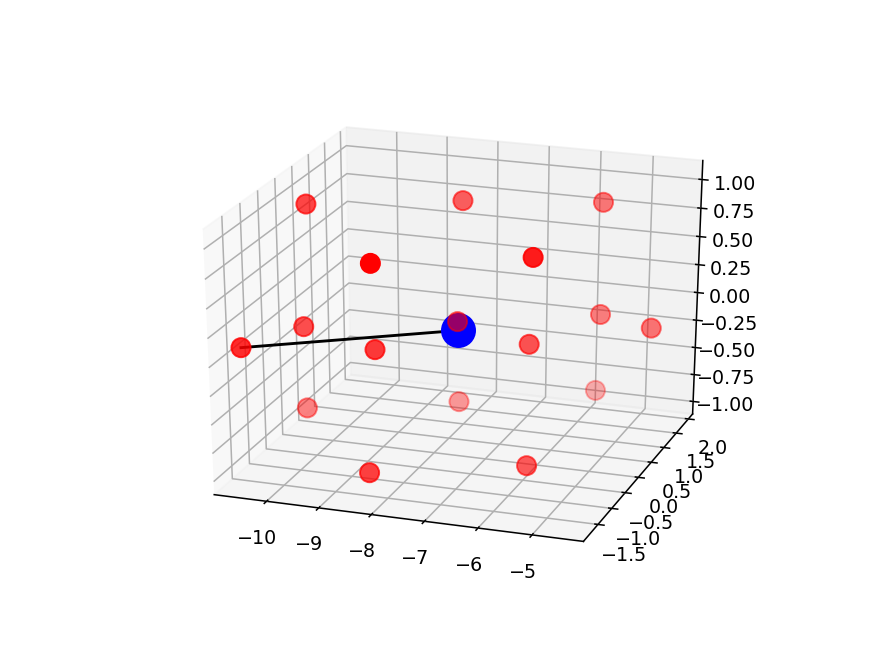

In [32]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(coor_mass[:,1],coor_mass[:,2],coor_mass[:,3],c = 'red',s = 100)
ax.scatter(center_mass[0],center_mass[1],center_mass[2], c = 'blue', s = 300)
ax.plot(radii[:,0],radii[:,1],radii[:,2], c = 'black')
plt.savefig(name+'.png', dpi = 1000)